In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from dateutil.relativedelta import relativedelta

# 코스피에서 종목 다운로드
def get_kospi():  
    download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do' 
    download_link = download_link + '?method=download'  
    download_link = download_link + '&marketType=' + "stockMkt"  
    df = pd.read_html(download_link, header=0)[0]  
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format) 
    return df

# kospi종목코드 다운로드
kospi_df = get_kospi()
kospi_df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,000210.KS,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,004840.KS,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660.KS,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,078930.KS,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,HDC현대산업개발,294870.KS,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
...,...,...,...,...,...,...,...,...,...
818,현대위아,011210.KS,자동차 신품 부품 제조업,"자동차부품, 공작기계 등",2011-02-21,12월,정재욱,http://www.hyundai-wia.com,경상남도
819,현대코퍼레이션,011760.KS,상품 종합 도매업,"자동차,철강,기계,선박,플랜트,컴퓨터,전자제품 수출,수출입대행/자원(탄광,유전) 개발",1977-12-01,12월,"정몽혁, 김원갑, 장안석(각자대표이사)",http://www.hyundaicorp.co.kr,서울특별시
820,현대코퍼레이션홀딩스,227840.KS,음·식료품 및 담배 도매업,"브랜드사업, 육류유통",2015-10-23,12월,"정몽혁, 김원갑(각자대표이사)",http://www.hyundaicorpholdings.com,서울특별시
821,화신,010690.KS,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조",1994-01-14,12월,"정서진, 장의호",http://www.hwashin.co.kr,경상북도


In [2]:
# 10년전부터 지금까지 주식데이터 획득
now = datetime.now()

before = now - relativedelta(years=10)

now_day = now.strftime("%Y-%m-%d")
befor_day = before.strftime("%Y-%m-%d")
print(f"end  : {now_day}")
print(f"start: {befor_day}")

회사이름_list = kospi_df["회사명"].to_list()
종목코드_list = kospi_df["종목코드"].to_list()

tmp_df = pdr.get_data_yahoo(종목코드_list[0], start=befor_day, end=now_day)
tmp_df

end  : 2022-10-13
start: 2012-10-13


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-15,85200.0,81100.0,84900.0,81500.0,570240.0,67826.710938
2012-10-16,83400.0,81700.0,82800.0,83000.0,201187.0,69075.046875
2012-10-17,85100.0,83000.0,83500.0,83700.0,288101.0,69657.601562
2012-10-18,86700.0,83000.0,84100.0,86400.0,364117.0,71904.625000
2012-10-19,86400.0,83300.0,86400.0,83900.0,293239.0,69824.046875
...,...,...,...,...,...,...
2022-10-06,60200.0,57900.0,58500.0,59600.0,62468.0,59600.000000
2022-10-07,59700.0,58500.0,59100.0,59500.0,55000.0,59500.000000
2022-10-11,59000.0,56700.0,58000.0,57000.0,68217.0,57000.000000


In [3]:
# 10개의 종목에서 데이터 획득
stock_df = pd.DataFrame()
for i,회사이름 in enumerate(회사이름_list):
    tmp_df = pdr.get_data_yahoo(종목코드_list[i], start=befor_day, end=now_day)
    stock_df[회사이름] = tmp_df["Close"]
    if i >= 10:
        break;

stock_df

,DL,DRB동일,DSR,GS,HDC현대산업개발,KG케미칼,KPX케미칼,KSS해운,KTis,LG이노텍,LG헬로비전
Date,,,,,,,,,,,
2012-10-15,81500.0,3853.491455,NaN,64700.0,NaN,9920.0,47700.0,3300.0,2710.0,75600.0,NaN
2012-10-16,83000.0,3853.491455,NaN,65100.0,NaN,10250.0,47900.0,3305.0,2700.0,79000.0,NaN
2012-10-17,83700.0,3853.491455,NaN,67100.0,NaN,9900.0,49000.0,3480.0,2710.0,80700.0,NaN
2012-10-18,86400.0,3853.491455,NaN,68900.0,NaN,11350.0,49350.0,3335.0,2765.0,81000.0,NaN
2012-10-19,83900.0,4712.553223,NaN,68400.0,NaN,11650.0,49150.0,3340.0,2760.0,79700.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,59600.0,4205.000000,4690.0,44100.0,10850.0,22200.0,48100.0,9200.0,2540.0,299000.0,4440.0
2022-10-07,59500.0,4295.000000,4715.0,44450.0,10800.0,22350.0,49150.0,9160.0,2535.0,295500.0,4390.0
2022-10-11,57000.0,4115.000000,4470.0,43850.0,10300.0,21350.0,48150.0,8910.0,2440.0,288000.0,4220.0


In [4]:
# 빈값을 채우기
stock_df = stock_df.fillna(method='backfill')

stock_df

,DL,DRB동일,DSR,GS,HDC현대산업개발,KG케미칼,KPX케미칼,KSS해운,KTis,LG이노텍,LG헬로비전
Date,,,,,,,,,,,
2012-10-15,81500.0,3853.491455,5750.0,64700.0,69987.234375,9920.0,47700.0,3300.0,2710.0,75600.0,15500.0
2012-10-16,83000.0,3853.491455,5750.0,65100.0,69987.234375,10250.0,47900.0,3305.0,2700.0,79000.0,15500.0
2012-10-17,83700.0,3853.491455,5750.0,67100.0,69987.234375,9900.0,49000.0,3480.0,2710.0,80700.0,15500.0
2012-10-18,86400.0,3853.491455,5750.0,68900.0,69987.234375,11350.0,49350.0,3335.0,2765.0,81000.0,15500.0
2012-10-19,83900.0,4712.553223,5750.0,68400.0,69987.234375,11650.0,49150.0,3340.0,2760.0,79700.0,15500.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,59600.0,4205.000000,4690.0,44100.0,10850.000000,22200.0,48100.0,9200.0,2540.0,299000.0,4440.0
2022-10-07,59500.0,4295.000000,4715.0,44450.0,10800.000000,22350.0,49150.0,9160.0,2535.0,295500.0,4390.0
2022-10-11,57000.0,4115.000000,4470.0,43850.0,10300.000000,21350.0,48150.0,8910.0,2440.0,288000.0,4220.0


In [5]:
#수익률 계산
수익률_df = pd.DataFrame()
수익률_df = stock_df.iloc[0] / stock_df.iloc[-1] * 100

수익률_df

DL           144.247788
DRB동일         97.680392
DSR          129.796840
GS           148.224513
HDC현대산업개발    689.529403
KG케미칼         49.108911
KPX케미칼       100.526870
KSS해운         35.908596
KTis         113.389121
LG이노텍         27.000000
LG헬로비전       379.901961
dtype: float64

In [6]:
#설치된 폰트 확인
import matplotlib.font_manager as fonm

font_list = [font.name for font in fonm.fontManager.ttflist]
for f in font_list:
    if "Nanum" in f:
        print(f)

NanumGothic
NanumGothic
NanumGothic


<AxesSubplot:>

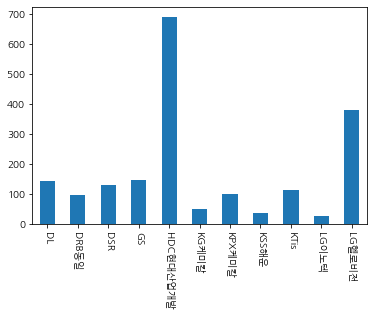

In [7]:
#폰트설정
import matplotlib as mat
mat.rcParams['font.family'] = 'NanumGothic'

# 그래프 그리기
수익률_df.plot.bar(rot=270)